<a href="https://colab.research.google.com/github/lozrigby/project-2-nlp-business-case-automated-customers-reviews/blob/main/Project_2_Trad_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Traditional NLP & ML approaches**

**Loading the data**

In [ ]:
import pandas as pd
from google.colab import drive
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import random
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
# Define the file path
file_path1 = '/content/drive/MyDrive/Ironhack/P2/1429_1.csv'


# Read the CSV file
df1 = pd.read_csv(file_path1)

print("Original dataframe:")
print(df1.head())


Original dataframe:
                     id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys m

<ipython-input-4-c84d72581454>:6: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file_path1)


In [ ]:
print("Columns in the DataFrame:")
print(df1.columns)

Columns in the DataFrame:
Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')


In [ ]:
rating_counts = df1['reviews.rating'].value_counts()

# Print the counts for each rating
print("Rating counts:")
print("1/2:", rating_counts.get(1, 0) + rating_counts.get(2, 0))  # Combine counts for 1 and 2 ratings
print("3:", rating_counts.get(3, 0))
print("4/5:", rating_counts.get(4, 0) + rating_counts.get(5, 0))

Rating counts:
1/2: 812
3: 1499
4/5: 32316


### **Data preprocessing**

**Data Cleaning**

- Removing special characters, punctuation, and whitespace

- Covert text to lowercase

In [ ]:
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = str(text) #non string errors

    text = text.lower()
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
df1['reviews.text'] = df1['reviews.text'].apply(clean_text)
df1 = df1[['reviews.text', 'reviews.rating']]
print("Cleaned DataFrame:")
print(df1.head())

Cleaned DataFrame:
                                        reviews.text  reviews.rating
0  this product so far has not disappointed my ch...             5.0
1  great for beginner or experienced person bough...             5.0
2  inexpensive tablet for him to use and learn on...             5.0
3  ive had my fire hd 8 two weeks now and i love ...             4.0
4  i bought this for my grand daughter when she c...             5.0


**Tokenisation and Lemmatization**

Tokenisation and removal of stopwords

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
 def tokenize_text(text):
     tokens = word_tokenize(text)
     tokens = [token for token in tokens if token not in stop_words]
     text = ' '.join(tokens)
     return tokens


In [ ]:
df1['reviews.text'] = df1['reviews.text'].apply(tokenize_text)
df1 = df1[['reviews.text', 'reviews.rating']]

In [ ]:
print("Tokenized DataFrame:")
print(df1.head())

Tokenized DataFrame:
                                        reviews.text  reviews.rating
0  [product, far, disappointed, children, love, u...             5.0
1  [great, beginner, experienced, person, bought,...             5.0
2  [inexpensive, tablet, use, learn, step, nabi, ...             5.0
3  [ive, fire, hd, 8, two, weeks, love, tablet, g...             4.0
4  [bought, grand, daughter, comes, visit, set, u...             5.0


Root form

In [ ]:
stemmer = PorterStemmer()

In [ ]:
def stem_text(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens


In [ ]:
df1['reviews.text'] = df1['reviews.text'].apply(stem_text)
df1 = df1[['reviews.text', 'reviews.rating']]

In [ ]:
print("Stemmed DataFrame:")
print(df1.head())

Stemmed DataFrame:
                                        reviews.text  reviews.rating
0  [product, far, disappoint, children, love, use...             5.0
1  [great, beginn, experienc, person, bought, gif...             5.0
2  [inexpens, tablet, use, learn, step, nabi, thr...             5.0
3  [ive, fire, hd, 8, two, week, love, tablet, gr...             4.0
4  [bought, grand, daughter, come, visit, set, us...             5.0


**Vectorization**

Convert the tokenised and stemmed text into strings so we can use TF-IDF vectorization

In [ ]:
df1['reviews.text'] = df1['reviews.text'].apply(lambda x: ' '.join(x))

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df1['reviews.text'])

In [ ]:
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())

TF-IDF Matrix Shape: (34660, 14104)
TF-IDF Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Random row summed up in order to check that not all values are 0

In [ ]:
random_row_index = random.randint(0, tfidf_matrix.shape[0] - 1)
random_row = tfidf_matrix[random_row_index].toarray()
row_sum = random_row.sum()

In [ ]:
print(f"Random Row Index: {random_row_index}")
print(f"Sum of TF-IDF Values in Random Row: {row_sum}")

Random Row Index: 14906
Sum of TF-IDF Values in Random Row: 3.7289671261393567


In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

In [ ]:
print("TF-IDF Matrix:")
print(tfidf_df.head())

TF-IDF Matrix:
   01052016  01162017  062017  0ff  0ne   10  100  1000  10000  1000ma  ...  \
0       0.0       0.0     0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...   
1       0.0       0.0     0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...   
2       0.0       0.0     0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...   
3       0.0       0.0     0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...   
4       0.0       0.0     0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...   

   zigbe  zinio  zip  zipper  zippi  zombiesotherwis  zone  zoo  zoom  zwave  
0    0.0    0.0  0.0     0.0    0.0              0.0   0.0  0.0   0.0    0.0  
1    0.0    0.0  0.0     0.0    0.0              0.0   0.0  0.0   0.0    0.0  
2    0.0    0.0  0.0     0.0    0.0              0.0   0.0  0.0   0.0    0.0  
3    0.0    0.0  0.0     0.0    0.0              0.0   0.0  0.0   0.0    0.0  
4    0.0    0.0  0.0     0.0    0.0              0.0   0.0  0.0   0.0    0.0  

[5 rows x 14104 columns]


In [ ]:
tfidf_sum = tfidf_matrix.sum(axis=0)

word_sum_tuples = [(word, tfidf_sum[0, idx]) for word, idx in tfidf_vectorizer.vocabulary_.items()]
word_sum_tuples = sorted(word_sum_tuples, key=lambda x: x[1], reverse=True)

Most popular words
- shows the postitive dataset sway

In [ ]:
top_n = 10
print(f"Top {top_n} Most Highly Used Words:")
for i, (word, sum_tfidf) in enumerate(word_sum_tuples[:top_n], start=1):
    print(f"{i}. {word}: {sum_tfidf:.2f}")

Top 10 Most Highly Used Words:
1. great: 1636.76
2. love: 1515.35
3. tablet: 1396.28
4. use: 1395.92
5. easi: 1103.27
6. good: 897.52
7. bought: 857.57
8. work: 841.58
9. kindl: 812.42
10. read: 808.26


Modelling

In [ ]:
df1 = df1[['reviews.text', 'reviews.rating']]

In [ ]:
def convert_rating_to_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

In [ ]:
df1['sentiment'] = df1['reviews.rating'].apply(convert_rating_to_sentiment)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, df1['sentiment'], test_size=0.2, random_state=42)

In [ ]:
print(f'Train set size: {x_train.shape[0]}')
print(f'Test set size: {x_test.shape[0]}')

Train set size: 27728
Test set size: 6932


**Naive Bayes Model**

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred = nb_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.9363819965377957
Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       161
     neutral       0.00      0.00      0.00       278
    positive       0.94      1.00      0.97      6493

    accuracy                           0.94      6932
   macro avg       0.31      0.33      0.32      6932
weighted avg       0.88      0.94      0.91      6932

Confusion Matrix:
[[   0    0  161]
 [   0    0  278]
 [   0    2 6491]]


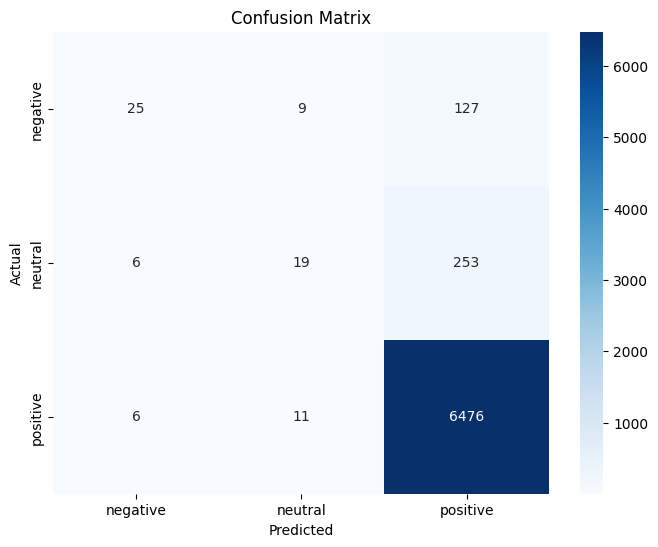

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Logistic Regression Model**

In [ ]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred2 = logreg_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred2)
report = classification_report(y_test, y_pred2, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred2)

In [ ]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.9406
Classification Report:
              precision    recall  f1-score   support

    negative       0.68      0.16      0.25       161
     neutral       0.49      0.07      0.12       278
    positive       0.94      1.00      0.97      6493

    accuracy                           0.94      6932
   macro avg       0.70      0.41      0.45      6932
weighted avg       0.92      0.94      0.92      6932

Confusion Matrix:
[[  25    9  127]
 [   6   19  253]
 [   6   11 6476]]


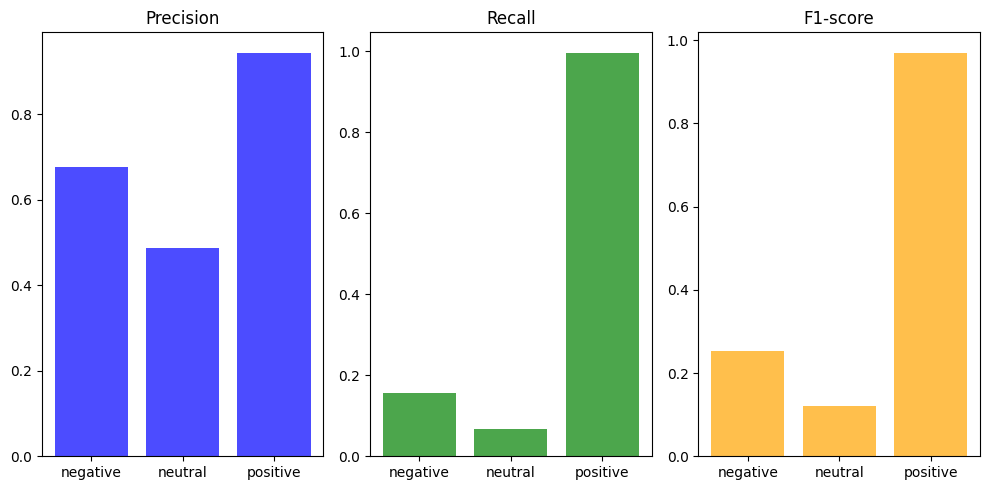

In [ ]:
labels = ['negative', 'neutral', 'positive']
metrics = classification_report(y_test, y_pred2, target_names=labels, zero_division=0, output_dict=True)

precision = [metrics[label]['precision'] for label in labels]
recall = [metrics[label]['recall'] for label in labels]
f1 = [metrics[label]['f1-score'] for label in labels]

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.bar(labels, precision, color='blue', alpha=0.7)
plt.title('Precision')

plt.subplot(1, 3, 2)
plt.bar(labels, recall, color='green', alpha=0.7)
plt.title('Recall')

plt.subplot(1, 3, 3)
plt.bar(labels, f1, color='orange', alpha=0.7)
plt.title('F1-score')

plt.tight_layout()
plt.show()

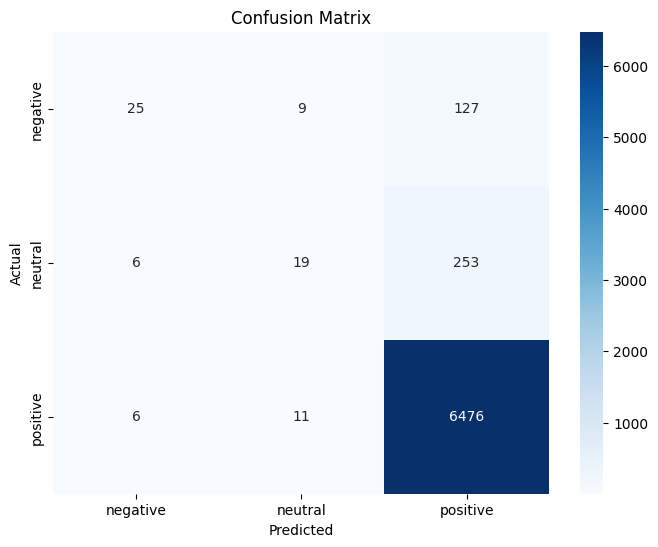

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Random Forest**

Base model

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred3 = rf_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred3)
report = classification_report(y_test, y_pred3, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred3)

print(f'Accuracy: {accuracy:.4f}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.9375
Classification Report:
              precision    recall  f1-score   support

    negative       0.67      0.02      0.05       161
     neutral       0.75      0.01      0.02       278
    positive       0.94      1.00      0.97      6493

    accuracy                           0.94      6932
   macro avg       0.78      0.35      0.35      6932
weighted avg       0.92      0.94      0.91      6932

Confusion Matrix:
[[   4    0  157]
 [   2    3  273]
 [   0    1 6492]]


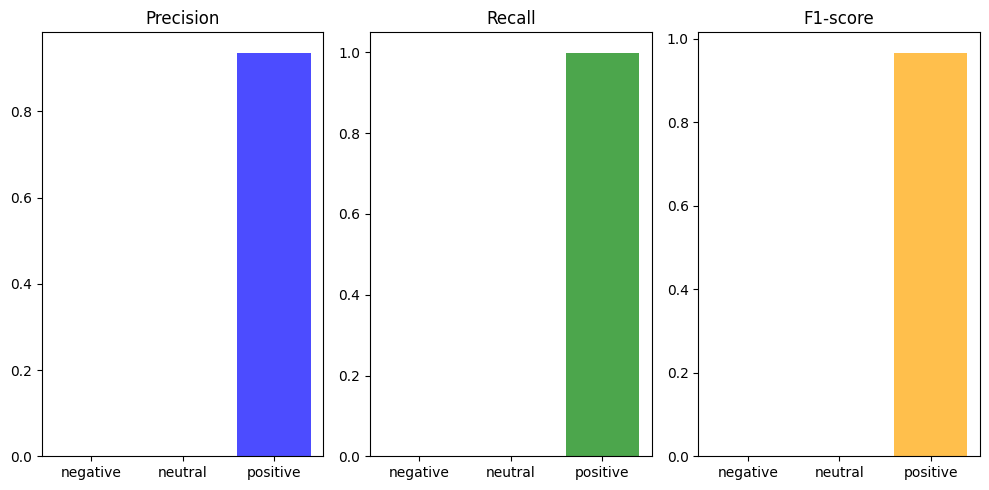

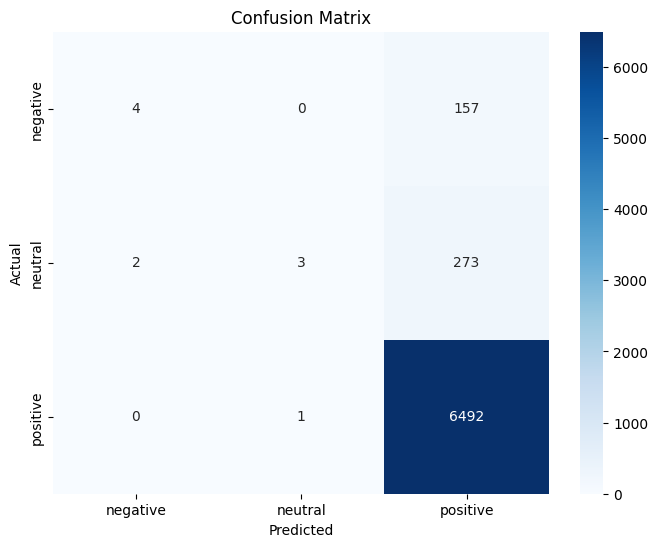

In [ ]:
labels = ['negative', 'neutral', 'positive']
metrics = classification_report(y_test, y_pred, target_names=labels, zero_division=0, output_dict=True)

precision = [metrics[label]['precision'] for label in labels]
recall = [metrics[label]['recall'] for label in labels]
f1 = [metrics[label]['f1-score'] for label in labels]

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.bar(labels, precision, color='blue', alpha=0.7)
plt.title('Precision')

plt.subplot(1, 3, 2)
plt.bar(labels, recall, color='green', alpha=0.7)
plt.title('Recall')

plt.subplot(1, 3, 3)
plt.bar(labels, f1, color='orange', alpha=0.7)
plt.title('F1-score')

plt.tight_layout()
plt.show()

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

SelectFromModel
- for selecting important features based on the trained random forest model

In [ ]:
from sklearn.feature_selection import SelectFromModel

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

sfm = SelectFromModel(rf_model, threshold='mean', prefit=True)
x_train_selected = sfm.transform(x_train)
x_test_selected = sfm.transform(x_test)


rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(x_train_selected, y_train)

y_pred_selected = rf_model_selected.predict(x_test_selected)

accuracy_selected = accuracy_score(y_test, y_pred_selected)
report_selected = classification_report(y_test, y_pred_selected, zero_division=0)
conf_matrix_selected = confusion_matrix(y_test, y_pred_selected)

print(f'Selected Features Accuracy: {accuracy_selected:.4f}')
print(f'Selected Features Classification Report:\n{report_selected}')
print(f'Selected Features Confusion Matrix:\n{conf_matrix_selected}')


Selected Features Accuracy: 0.9370
Selected Features Classification Report:
              precision    recall  f1-score   support

    negative       0.57      0.05      0.09       161
     neutral       0.40      0.01      0.03       278
    positive       0.94      1.00      0.97      6493

    accuracy                           0.94      6932
   macro avg       0.64      0.35      0.36      6932
weighted avg       0.91      0.94      0.91      6932

Selected Features Confusion Matrix:
[[   8    0  153]
 [   2    4  272]
 [   4    6 6483]]


SMOTE (Minority oversampling technique)
- To address the imbalance of classes in the training data
- This adjusts weights inversely proportional to class frequencies in the input data, addressing any residual class imbalance.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(x_train_resampled, y_train_resampled)

y_pred = rf_model.predict(x_test)

report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.9375
Classification Report:
              precision    recall  f1-score   support

    negative       0.20      0.37      0.26       161
     neutral       0.15      0.28      0.19       278
    positive       0.96      0.90      0.93      6493

    accuracy                           0.87      6932
   macro avg       0.44      0.52      0.46      6932
weighted avg       0.91      0.87      0.89      6932

Confusion Matrix:
[[  59   26   76]
 [  21   77  180]
 [ 208  411 5874]]


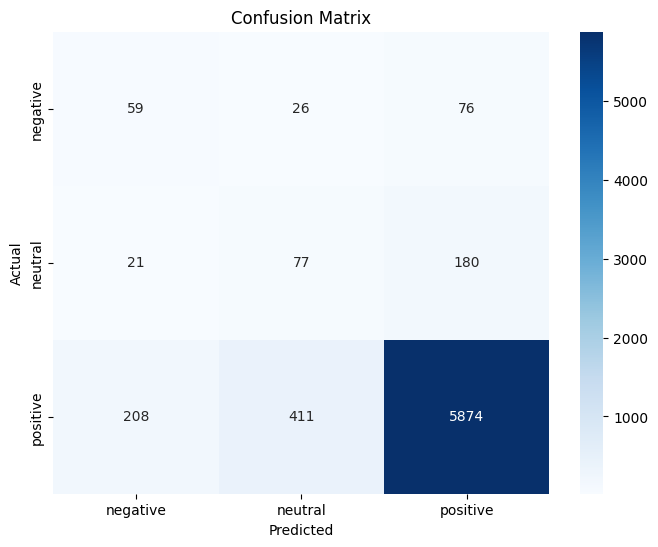

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Hyperparameted tuning using 'RandomisedSearchCV'
- RandomizedSearchCV is set up to perform a randomized search over the specified parameter grid

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True]
}

rf_model = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='accuracy',
                                   verbose=1, random_state=42, n_jobs=-1)

random_search.fit(x_train, y_train)

print("Best Parameters found by Randomized Search:")
print(random_search.best_params_)

best_rf_model = random_search.best_estimator_

y_pred_best = best_rf_model.predict(x_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nAccuracy (Best Parameters): {accuracy_best:.2f}")

report_best = classification_report(y_test, y_pred_best, zero_division=0)
print("Classification Report (Best Parameters):")
print(report_best)

conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix (Best Parameters):")
print(conf_matrix_best)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters found by Randomized Search:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}

Accuracy (Best Parameters): 0.94
Classification Report (Best Parameters):
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       161
     neutral       0.00      0.00      0.00       278
    positive       0.94      1.00      0.97      6493

    accuracy                           0.94      6932
   macro avg       0.31      0.33      0.32      6932
weighted avg       0.88      0.94      0.91      6932

Confusion Matrix (Best Parameters):
[[   0    0  161]
 [   0    0  278]
 [   0    0 6493]]


Grid Search
- A systematic search method to explore different hyperparameter combinations thoroughly

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best Parameters found by Grid Search:")
print(grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

y_pred_best = best_rf_model.predict(x_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nAccuracy (Best Parameters): {accuracy_best:.2f}")

report_best = classification_report(y_test, y_pred_best, zero_division=0)
print("Classification Report (Best Parameters):")
print(report_best)

conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix (Best Parameters):")
print(conf_matrix_best)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters found by Grid Search:
{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Accuracy (Best Parameters): 0.94
Classification Report (Best Parameters):
              precision    recall  f1-score   support

    negative       0.56      0.03      0.06       161
     neutral       0.40      0.01      0.01       278
    positive       0.94      1.00      0.97      6493

    accuracy                           0.94      6932
   macro avg       0.63      0.35      0.35      6932
weighted avg       0.91      0.94      0.91      6932

Confusion Matrix (Best Parameters):
[[   5    0  156]
 [   3    2  273]
 [   1    3 6489]]


In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best Parameters found by Grid Search:")
print(grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

y_pred_best = best_rf_model.predict(x_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nAccuracy (Best Parameters): {accuracy_best:.2f}")

report_best = classification_report(y_test, y_pred_best, zero_division=0)
print("Classification Report (Best Parameters):")
print(report_best)

conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix (Best Parameters):")
print(conf_matrix_best)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters found by Grid Search:
{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Accuracy (Best Parameters): 0.94
Classification Report (Best Parameters):
              precision    recall  f1-score   support

    negative       0.67      0.02      0.05       161
     neutral       0.75      0.01      0.02       278
    positive       0.94      1.00      0.97      6493

    accuracy                           0.94      6932
   macro avg       0.78      0.35      0.35      6932
weighted avg       0.92      0.94      0.91      6932

Confusion Matrix (Best Parameters):
[[   4    0  157]
 [   2    3  273]
 [   0    1 6492]]
